# Pymaceuticals Inc.
---

### Analysis

- Based on my research, as time goes on, the tumor size goes down for the mice being treated by Capomulin
- Based on the scatter plot below, the larger the mouse, the larger the tumor volume.
- While the sex of the mice is almost exactly a 50/50 split, this information does not really help us draw any additional conlusions for this project. 


 

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [5]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df2 = df.loc[mask].reset_index(drop=True)
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
# Checking the number of mice in the clean DataFrame.
df2["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
means = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medians =  df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variances =  df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standdevs =  df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

pd.DataFrame({"Mean": means, "Median": medians, "Variance": variances, "Standard Deviation": standdevs,
             "Sem": sems})


,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

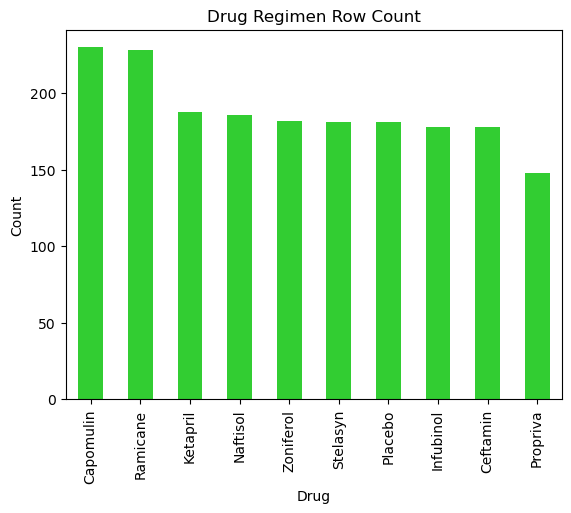

<Figure size 1100x700 with 0 Axes>

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
values = df2["Drug Regimen"].value_counts()
values.plot(kind="bar", xlabel="Drug", ylabel="Count", title="Drug Regimen Row Count", color="limegreen")
plt.figure(figsize=(11,7))
plt.show()

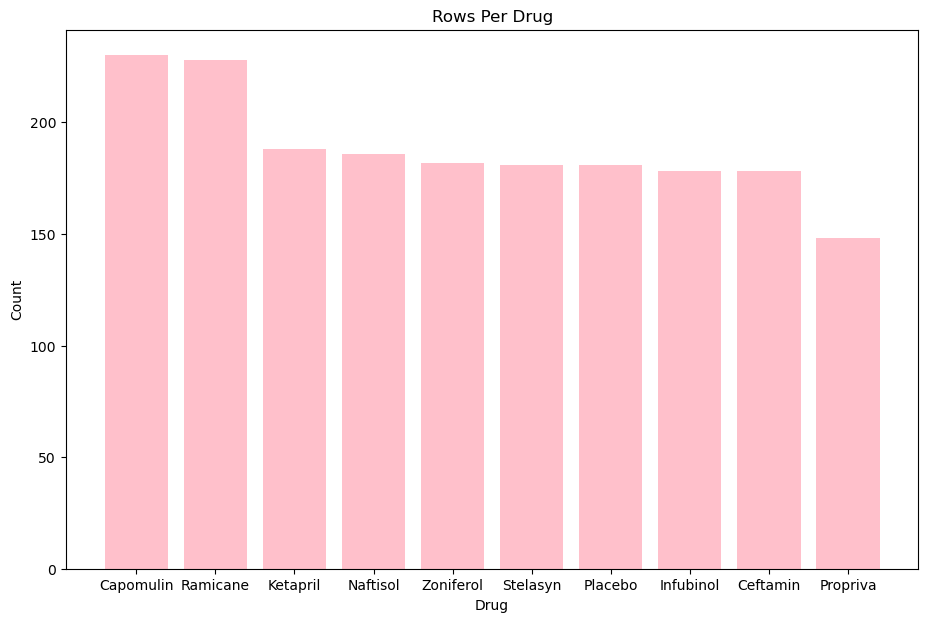

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
values=df2["Drug Regimen"].value_counts()

plt.figure(figsize=(11,7))
plt.bar(values.index,values, color="pink")
plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Rows Per Drug")
plt.show()

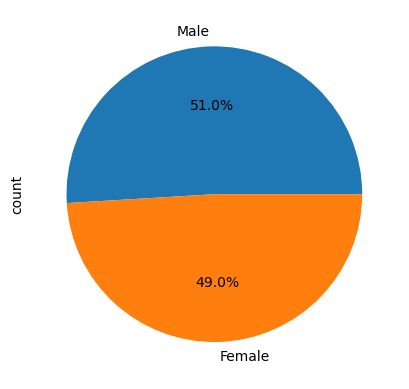

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
values = df2["Sex"].value_counts()
values.plot(kind="pie", autopct='%1.1f%%')
plt.show()

In [15]:
colors=["red","lightblue"]

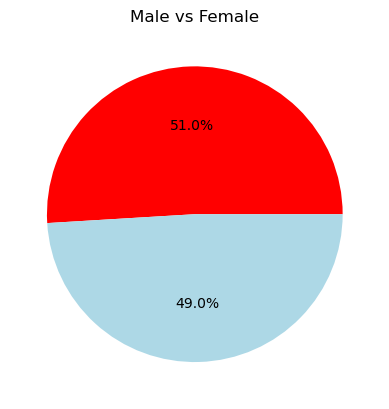

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values=df2["Sex"].value_counts()
plt.pie(values, colors=colors,
        autopct="%1.1f%%")
plt.title("Male vs Female")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_df = pd.DataFrame(df.groupby('Mouse ID')['Timepoint'].max().sort_values())
last_time_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3=pd.merge(df2, last_time_df, on='Mouse ID')
df3.head(15)

,Mouse ID,Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
5,b128,25,43.262145,1,Capomulin,Female,9,22,45
6,b128,30,40.605335,1,Capomulin,Female,9,22,45
7,b128,35,37.967644,1,Capomulin,Female,9,22,45
8,b128,40,38.379726,2,Capomulin,Female,9,22,45
9,b128,45,38.982878,2,Capomulin,Female,9,22,45


In [18]:
df3["Mouse ID"].value_counts()

Mouse ID
b128    10
q787    10
c559    10
s337    10
q511    10
        ..
n482     1
t573     1
f932     1
o848     1
x336     1
Name: count, Length: 248, dtype: int64

In [19]:
import seaborn as sns

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', "Infubinol", "Ceftamin", "Ramicane"]


# Create empty list to fill with tumor vol data (for plotting)
treatment_values = []

for treatment in treatments:
    
        sub = df3.loc[df3["Drug Regimen"] == treatment]
        
        tumor= sub["Tumor Volume (mm3)"]
        treatment_values.append(tumor)
        
        

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)



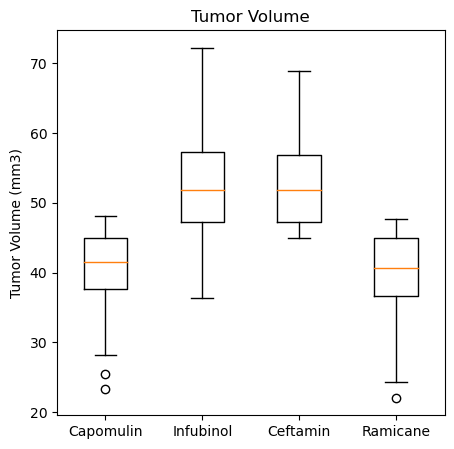

In [21]:
plt.figure(figsize=(5,5))
plt.boxplot(treatment_values, labels=treatments)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume")
plt.show()

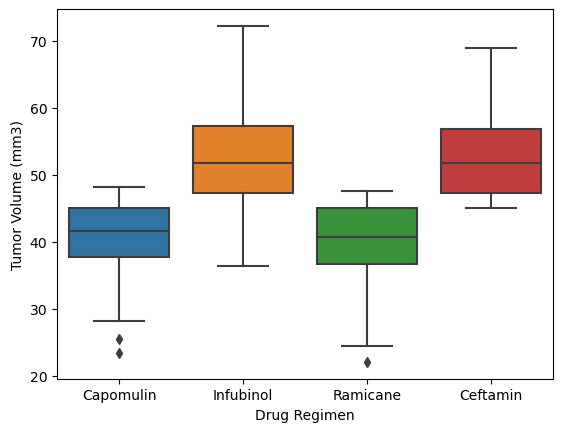

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
df4 = df3.loc[df3["Drug Regimen"].isin(['Capomulin', "Infubinol", "Ceftamin", "Ramicane"])]
sns.boxplot(df4, x="Drug Regimen", y="Tumor Volume (mm3)")
plt.show()
#used seaborn to add boxplot https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

## Line and Scatter Plots

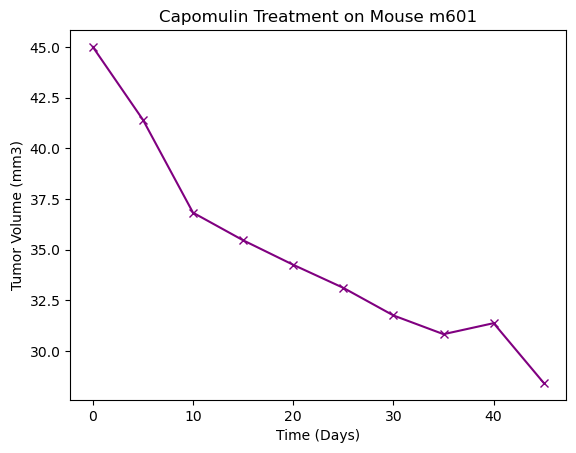

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = df2.loc[df2['Mouse ID']== 'm601']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'x', color= "purple")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment on Mouse m601")
plt.show()

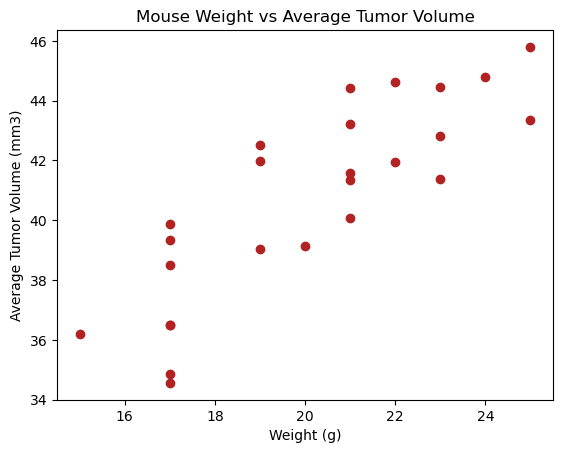

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = df2.loc[df2['Drug Regimen'] == 'Capomulin']

mean_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
mean_volume_df = pd.merge(capomulin_df, mean_volume_df, on= 'Mouse ID')
complete_avg_df = mean_volume_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
complete_avg_df

x= complete_avg_df['Weight (g)']
y= complete_avg_df['avg_tumor_vol']

plt.scatter(x,y, color="firebrick")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse Weight vs Average Tumor Volume')
plt.show()

## Correlation and Regression

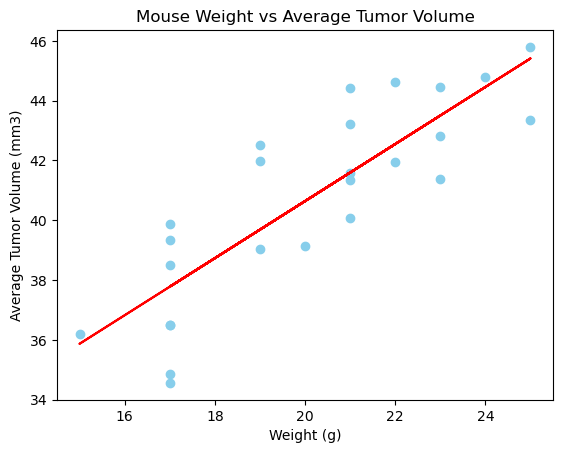

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df = df2.loc[df2['Drug Regimen'] == 'Capomulin']

mean_volume_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
mean_volume_df = pd.merge(capomulin_df, mean_volume_df, on= 'Mouse ID')
complete_avg_df = mean_volume_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
complete_avg_df


x= complete_avg_df['Weight (g)']
y= complete_avg_df['avg_tumor_vol']
#referenced regression solution week 5 day 3 activity 8 for regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.scatter(x,y, color="skyblue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Mouse Weight vs Average Tumor Volume')
# corr=data.corr(["Weight (g)"]["Average Tumor Volume (mm3)"])
# print(f"The correlation is{corr}")
plt.show()